<a href="https://colab.research.google.com/github/Muskuu1109/EDA-ASSIGNMENT/blob/main/EDA_on_bike_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv("BIKE DETAILS.csv")  # Update with your actual file path

# Get basic info
print(df.info())

# Summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB
None
       selling_price         year      km_driven  ex_showroom_price
count    1061.000000  1061.000000    1061.000000       6.260000e+02
mean    59638.151744  2013.867107   34359.833176       8.795871e+04
std     56304.291973     4.301191   51623.152702       7.749659e+04
min      5000.000000  1988.000000     350.000000       3.049000e+04
25%     28000.000000  2011.000000   13500.000000      

In [3]:
import pandas as pd

# Assuming you have a DataFrame named df
min_price = df["selling_price"].min()
max_price = df["selling_price"].max()

print(f"The range of selling prices is from {min_price} to {max_price} INR.")

The range of selling prices is from 5000 to 760000 INR.


In [4]:
# Calculate the median selling price
median_price = df["selling_price"].median()

print(f"The median selling price for bikes in the dataset is {median_price} INR.")

The median selling price for bikes in the dataset is 45000.0 INR.


In [5]:
# Find the most common seller type
most_common_seller = df["seller_type"].mode()[0]

print(f"The most common seller type in the dataset is '{most_common_seller}'.")

The most common seller type in the dataset is 'Individual'.


In [6]:
# Count bikes with km_driven greater than 50,000 km
high_mileage_bikes = df[df["km_driven"] > 50000].shape[0]

print(f"There are {high_mileage_bikes} bikes that have been driven more than 50,000 kilometers.")

There are 170 bikes that have been driven more than 50,000 kilometers.


In [7]:
# Calculate the average km_driven for each ownership type
avg_km_per_owner = df.groupby("owner")["km_driven"].mean()

print("Average km_driven value for each ownership type:")
print(avg_km_per_owner)

Average km_driven value for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [8]:
# Count bikes from the year 2015 or older
old_bikes_count = df[df["year"] <= 2015].shape[0]

# Calculate proportion
total_bikes = df.shape[0]
proportion_old_bikes = old_bikes_count / total_bikes

print(f"The proportion of bikes from the year 2015 or older is {proportion_old_bikes:.2%}.")

The proportion of bikes from the year 2015 or older is 56.64%.


Missing values per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


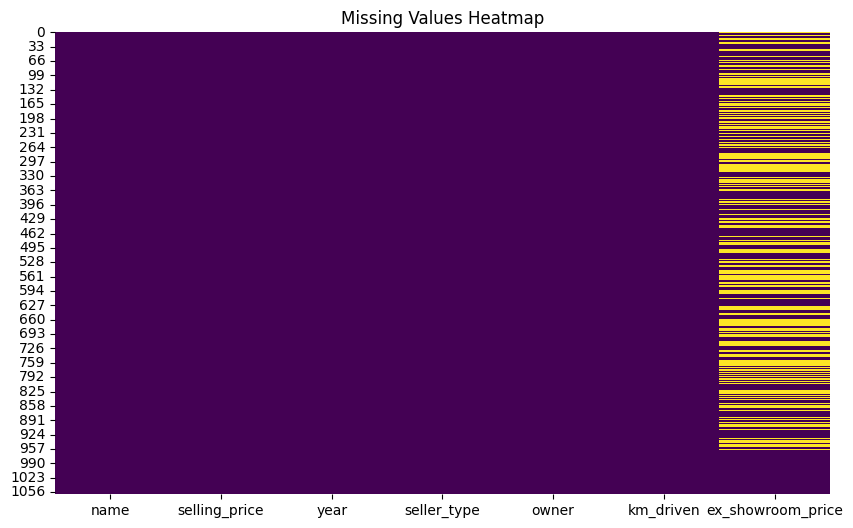

In [9]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display missing values trend
print("Missing values per column:")
print(missing_values)

# Visualizing missing values with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [10]:
# Find the highest ex-showroom price
max_ex_showroom_price = df["ex_showroom_price"].max()

# Retrieve the corresponding bike(s)
bike_with_max_price = df[df["ex_showroom_price"] == max_ex_showroom_price]["name"].values

print(f"The highest ex-showroom price recorded is {max_ex_showroom_price} INR for the bike(s): {', '.join(bike_with_max_price)}.")

The highest ex-showroom price recorded is 1278000.0 INR for the bike(s): Harley-Davidson Street Bob.


In [11]:
# Count total number of bikes listed by each seller type
seller_counts = df["seller_type"].value_counts()

print("Total number of bikes listed by each seller type:")
print(seller_counts)

Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


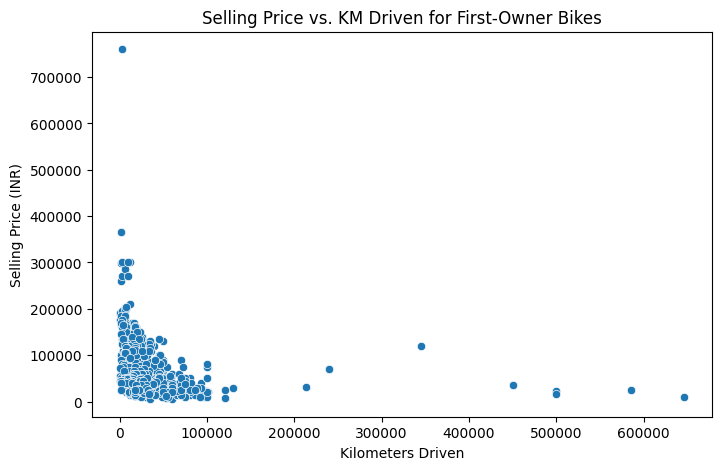

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter first-owner bikes
first_owner_bikes = df[df["owner"] == "1st owner"]

# Scatter plot for selling_price vs. km_driven
plt.figure(figsize=(8, 5))
sns.scatterplot(x=first_owner_bikes["km_driven"], y=first_owner_bikes["selling_price"])

plt.title("Selling Price vs. KM Driven for First-Owner Bikes")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price (INR)")
plt.show()

In [13]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)

# Compute Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

print(f"Original dataset size: {df.shape[0]}")
print(f"Filtered dataset size (without outliers): {df_filtered.shape[0]}")

Original dataset size: 1061
Filtered dataset size (without outliers): 1022


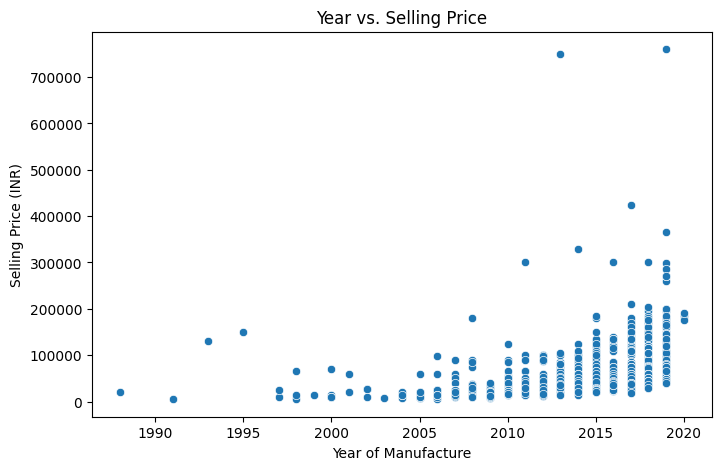

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for year vs. selling_price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["year"], y=df["selling_price"])

plt.title("Year vs. Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price (INR)")
plt.show()

In [15]:
import datetime

# Compute bike age (current year - manufacturing year)
current_year = datetime.datetime.now().year
df["bike_age"] = current_year - df["year"]

# Calculate depreciation as the difference between showroom price and selling price
df["depreciation"] = df["ex_showroom_price"] - df["selling_price"]

# Compute average depreciation per age group
avg_depreciation_by_age = df.groupby("bike_age")["depreciation"].mean()

print("Average depreciation in selling price based on bike age:")
print(avg_depreciation_by_age)

Average depreciation in selling price based on bike age:
bike_age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
22             NaN
23             NaN
24    34852.000000
25             NaN
26             NaN
27             NaN
28             NaN
30             NaN
32             NaN
34             NaN
37             NaN
Name: depreciation, dtype: float64


In [16]:
# Compute the average selling price per manufacturing year
avg_price_per_year = df.groupby("year")["selling_price"].mean()

# Merge the average prices into the original dataframe
df = df.merge(avg_price_per_year.rename("avg_year_price"), on="year")

# Filter bikes priced significantly above the average (e.g., 1.5 times the average price)
premium_bikes = df[df["selling_price"] > 1.5 * df["avg_year_price"]][["name", "selling_price", "year"]]

print("Bikes priced significantly above the average price for their manufacturing year:")
print(premium_bikes)

Bikes priced significantly above the average price for their manufacturing year:
                                     name  selling_price  year
2     Royal Enfield Classic Gunmetal Grey         150000  2018
7    Royal Enfield Bullet 350 [2007-2011]         180000  2008
13                          Yamaha YZF R3         365000  2019
18    Royal Enfield Classic Gunmetal Grey         150000  2018
23                          Jawa Standard         180000  2019
..                                    ...            ...   ...
979             Royal Enfield Thunder 500         105000  2015
981             Royal Enfield Thunder 350         105000  2013
983             Royal Enfield Classic 350         100000  2015
984             Royal Enfield Classic 500          95000  2014
985             Royal Enfield Classic 500          90000  2011

[157 rows x 3 columns]


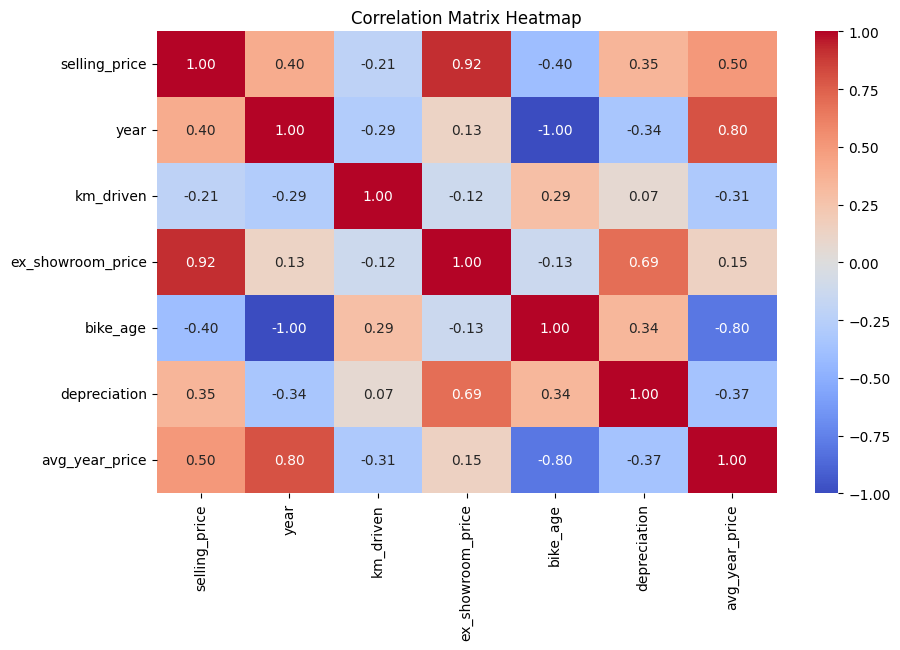

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns
corr_matrix = df.select_dtypes(include=["number"]).corr()

# Visualizing correlation matrix using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix Heatmap")
plt.show()